<img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# Assessment:  Mercedes-Benz Greener Manufacturing

*The comments/sections provided are your cues to perform the assignment. You don't need to limit yourself to the number of rows/cells provided. You can add additional rows in each section to add more lines of code.*

*If at any point in time you need help on solving this assignment, view our demo video to understand the different steps of the code.*

**Happy coding!**

* * *

# Project 1: Mercedes-Benz Greener Manufacturing

__DESCRIPTION__

Reduce the time a Mercedes-Benz spends on the test bench.

__Problem Statement Scenario:__

Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

__Following actions should be performed:__

* If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
* Check for null and unique values for test and train sets.
* Apply label encoder.
* Perform dimensionality reduction.
* Predict your test_df values using XGBoost.

## Import the required libraries

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

# importing the library to ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Read the train dataset

In [2]:
# importing the train dataset
train_original = pd.read_csv('train.csv')

# let us understand the train data
print('Size of training set: {} rows and {} columns'.format(*train_original.shape))

# print first fove rows of training set
train_original.head()

Size of training set: 4209 rows and 378 columns


,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


* There are 4209 data points and 378 features in the dataset.
* It is observed that there are more number of features with binary values. Hence sparsity exists in the train data.
* Target feature 'y' from the training data is 'the time that cars spend on the test bench.

In [3]:
# check the info of the train data
train_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.0+ MB


* The train dataset has one feature with float64 datatype which is target (Y) features.
* The train dataset has 369 features with int64 datatype which are features having binary values (0 & 1).
* The train dataset has 8 features with object datatype which are features having categorical data.

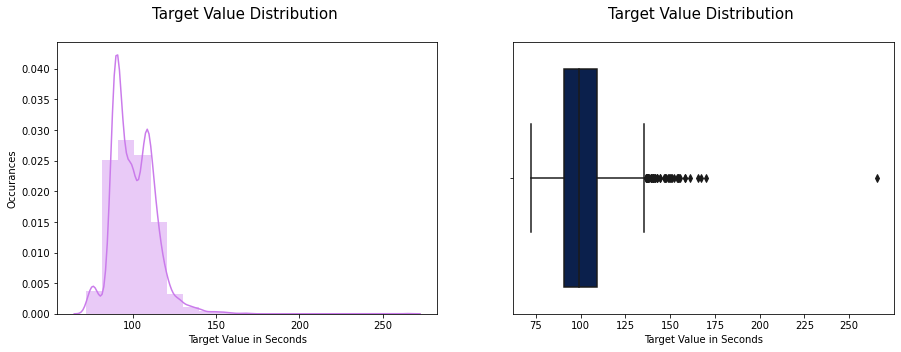

In [4]:
colors = ['#001c57','#50248f','#a6a6a6','#38d1ff','#ca7beb','#c8aef8','#9154f8','#cef3f5']
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(train_original.y.values, bins=20, color=colors[4])
plt.title('Target Value Distribution \n',fontsize=15)
plt.xlabel('Target Value in Seconds'); plt.ylabel('Occurances');

plt.subplot(122)
sns.boxplot(train_original.y.values, color=colors[0])
plt.title('Target Value Distribution \n',fontsize=15)
plt.xlabel('Target Value in Seconds');

## If for any column(s), the variance is equal to zero, then we need to remove those variable(s)

In [5]:
#checking the variance of all the features in the train dataset and storing it to new object
train_original_var=pd.DataFrame(train_original.var(axis=0),columns=['Variance'])
train_original_var

,Variance
ID,5.941936e+06
y,1.607667e+02
X10,1.313092e-02
X11,0.000000e+00
X12,6.945713e-02
...,...
X380,8.014579e-03
X382,7.546747e-03
X383,1.660732e-03
X384,4.750593e-04


* Define a function to remove the features of train dataset with zero variance. 
* Add the object train_original to the function. i.e., features_zero_var(train_original). 
* The variance with respect to each features in the train_original dataset will be stored in the object df_original_var. 
* The index contains the feature names and the corresponding variances will be displayed in the column with name 'Variance'. Then, it returns only the features of object 'df_original_var' having variance = 0. 
* The name df_original_var is used because the function will be used on both train and test data.

In [6]:
#Define a function to remove the features of train dataset with zero variance 
def features_zero_var(df):
    df_original_var=pd.DataFrame(df.var(axis=0),columns=['Variance']) 
    return((df_original_var[df_original_var.Variance==0]))

In [7]:
# Call the function to return the train dataset features having zero variance.
features_zero_var(train_original)

,Variance
X11,0.0
X93,0.0
X107,0.0
X233,0.0
X235,0.0
X268,0.0
X289,0.0
X290,0.0
X293,0.0
X297,0.0


Above columns are the list of features having zero variance in training dataset.

In [8]:
# Remove the features with zero variance from train dataset and store the data in the new object
train_original_modified= train_original.drop(columns=train_original_var[train_original_var.Variance==0].index)

In [9]:
# Display the modified train dataset after removing the features having zero variance
train_original_modified.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Print the original and modified shape of the train dataset
print('Shape of original train dataset is:', train_original.shape)
print('\nShape of modified train dataset after removing features having zero variance is:', train_original_modified.shape)

Shape of original train dataset is: (4209, 378)

Shape of modified train dataset after removing features having zero variance is: (4209, 366)


The modified train dataset contains 366 features, which means the 12 features with zero variance from the original dataset is removed.

In [11]:
# Save the modified train dataset
train_original_modified.to_csv('train_original_modified.csv',index=False)

### Similarly, Read the Test Dataset and  remove the zero variance features from the dataset

In [12]:
#import the test dataset
test_original = pd.read_csv('test.csv')


# let us understand the test data
print('Size of testing set: {} rows and {} columns'.format(*test_original.shape))

# print few rows and see how the data looks like
test_original.head()

Size of testing set: 4209 rows and 377 columns


,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


* There are 4209 data points and 377 features in the test dataset.
* Number of features in the test dataset is 377 because, the target feature 'y' is intentionally removed from the test dataset compared to train dataset.

In [13]:
# Check the original variance of all the features in the test dataset and store it to new object
test_original_var=pd.DataFrame(test_original.var(axis=0),columns=['Variance'])
test_original_var

,Variance
ID,5.871311e+06
X10,1.865006e-02
X11,2.375861e-04
X12,6.885074e-02
X13,5.734498e-02
...,...
X380,8.014579e-03
X382,8.715481e-03
X383,4.750593e-04
X384,7.124196e-04


In [14]:
# Call the function to return the test dataset features having zero variance.
features_zero_var(test_original)

,Variance
X257,0.0
X258,0.0
X295,0.0
X296,0.0
X369,0.0


* Above listed features have zero variance.
* However, since test dataset is not considered for training and only used for testing, we can remove the same features with zero variance as in train dataset.
* This will ensure the same size and shape of the train and test dataset.

In [15]:
# In test dataset, remove the same features of train dataset having zero variance.
test_original_modified= test_original.drop(columns=['X11', 'X93', 'X107','X233', 'X235', 'X268', 'X289', 'X290', 'X293','X297','X330','X347'])

In [16]:
# Display the modified test dataset after removing the features having zero variance
test_original_modified.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [17]:
# Print the original and modified shape of the test dataset
print('Shape of original test dataset is:', test_original.shape)
print('\nShape of modified test dataset after removing features having zero variance is:', test_original_modified.shape)

Shape of original test dataset is: (4209, 377)

Shape of modified test dataset after removing features having zero variance is: (4209, 365)


* The modified test dataset contains 365 features. This is because, we had removed the same 12 features having zero variance in the train dataset.
* The modified test dataset has 365 features, whereas modified train dataset had 366 features. This is because target feature 'y' is missing  in the train dataset.

In [18]:
# Save the modified test dataset
test_original_modified.to_csv('test_original_modified.csv',index=False)

##  Check for the null and unique values in the train dataset

In [19]:
# Check the null values in the train dataset
print('The sum of null values in the train dataset is:', train_original_modified.isnull().any().sum())

The sum of null values in the train dataset is: 0


There are no null values in the train dataset.

The unique() function includes the missing value. But the nunique() function excludes the missing value as the default parameter is dropna=True. Since, there are no missing values in the train dataset, we can use nunique().

In [20]:
# Check the unique values in the train dataset
train_original_modified_UV=pd.DataFrame(train_original_modified.nunique(),columns=['Unique_Values'])
train_original_modified_UV

,Unique_Values
ID,4209
y,2545
X0,47
X1,27
X2,44
...,...
X380,2
X382,2
X383,2
X384,2


* It is observed that all the values in ID column are unique. In the provided dataaset, the ID represents the unique car configuration. So, this feature must be ignored for training as it will not make any sense to the prediction. 
* 'y' feature is the target feature. 
* Features X0,X1,X2,X3,X4,X5,X6,X8 are the categorical features which must be converted to numerical values/one hot encoded values.
* All the features after X8 are having binary values.

In [21]:
# Print the train dataset features unique values where the values = 2 and values>2.
print('Train Features with unique values greater than 2 are as follows:\n',train_original_modified_UV[train_original_modified_UV.Unique_Values>2].unstack())
print('\nTest Features with unique values equal to 2 are as follows:\n',train_original_modified_UV[train_original_modified_UV.Unique_Values==2].unstack())

Train Features with unique values greater than 2 are as follows:
 Unique_Values  ID    4209
               y     2545
               X0      47
               X1      27
               X2      44
               X3       7
               X4       4
               X5      29
               X6      12
               X8      25
dtype: int64

Test Features with unique values equal to 2 are as follows:
 Unique_Values  X10     2
               X12     2
               X13     2
               X14     2
               X15     2
                      ..
               X380    2
               X382    2
               X383    2
               X384    2
               X385    2
Length: 356, dtype: int64


* Out of 366 train dataset features, 10 features are having greater than 2 unique values and remaining features are having only 2 unique values (0 and 1). 

### Similarly, check the  null and unique values in the  test dataset 

In [22]:
# Check the null values in the test dataset
print('The sum of null values in the test dataset is:', test_original_modified.isnull().any().sum())

The sum of null values in the test dataset is: 0


* There are no null values in the test dataset.

In [23]:
# Check the unique values in the test dataset
test_original_modified_UV=pd.DataFrame(test_original_modified.nunique(),columns=['Unique_Values'])
test_original_modified_UV

,Unique_Values
ID,4209
X0,49
X1,27
X2,45
X3,7
...,...
X380,2
X382,2
X383,2
X384,2


* It is observed that all the valus in ID column are unique. In the provided dataset, the ID represents the unique car configuration. So, this feature must be ignored for testing as it will not make any sense to the prediction.
* Features X0,X1,X2,X3,X4,X5,X6,X8 are the categorical features which must be converted to numerical values/one hot encoded values.
* All the features after X8 are having binary values.

In [24]:
# Print the test dataset features unique values where the values = 2 and values >2.
print('Test Features with unique values greater than 2 are as follows:\n',test_original_modified_UV[test_original_modified_UV.Unique_Values>2].unstack())
print('\nTest Features with unique values equal to 2 are as follows:\n',test_original_modified_UV[test_original_modified_UV.Unique_Values==2].unstack())

Test Features with unique values greater than 2 are as follows:
 Unique_Values  ID    4209
               X0      49
               X1      27
               X2      45
               X3       7
               X4       4
               X5      32
               X6      12
               X8      25
dtype: int64

Test Features with unique values equal to 2 are as follows:
 Unique_Values  X10     2
               X12     2
               X13     2
               X14     2
               X15     2
                      ..
               X380    2
               X382    2
               X383    2
               X384    2
               X385    2
Length: 351, dtype: int64


* Out of 365 test dataset features, 9 features are having greater than 2 unique values and remaining features are having only 2 unique values (0 and 1). 

## Apply the label encoder/one hot encoding  for the train dataset

Before applying label encoder, separate the ID and 'y' features from the train dataset.

In [25]:
#Drop the columns 'ID' and 'y' and store the data into new object train_X_check and verify the shape
train_X_check = train_original_modified.drop(columns = ['ID','y'])
# train_X_check to verify how the one hot encoding works for the features with multi categorical variables 
train_X_check.shape

(4209, 364)

In [26]:
# perform label encoder/one hot encoding for the categories features of train_X_check

# Import the required library
from sklearn.preprocessing import LabelEncoder

# Define the function to apply the label encoder for the categories features of train_X_check
def label_encoder(df,x):
    # select only the features with datatype Object
    features_cat=df.select_dtypes(include='object').columns 
    # instantiate the label encoder
    le=LabelEncoder() 
    for i in features_cat:
        # Fit,transform 
        # And replace with label-encoded data for the existing data in the object datatype columns of train_X_check
        x[i]=le.fit_transform(x[i]) 

In [27]:
# Call the function to apply label encoder for the train_X_check data
label_encoder(train_original_modified,train_X_check)

In [28]:
# verify the train_X dataset
train_X_check.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
train_X_check.X5.nunique()

29

* It is observed from the above table, that the label encoder is applied to categorial features of train_X_check data, the encoded labels are not binary (0 and 1) since the features has 4 or more different categories.
* Example: X5 feature has 29(0 to 28) unique categories. So, when label encoder is applied, the categories will be replaced with 28 unique values starting from 0 to 28.
* This may impact the accuracy level.
* In order to fix this issue, we have to perform one hot encoding for multi-categorical variables, the  procedure is follows as
    * Identify the top 10 most frequent categories from each feature. 
    * Perform one hot encoding only for the top 10 most frequent categories.
    * All Top 10 most frequent categories will be considered as '1' and all the remaining categories will be considered as '0' in each feature.
    * By performing above 3 steps ensures only binary values (0 and 1) in all the features

In [30]:
# Identify the top 10 most frequent categories of features X0,X1,X2,X3,X4,X5,X6,X8

#X0
train_original_modified.X0.value_counts().sort_values(ascending=False).head(10)

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
Name: X0, dtype: int64

In [31]:
# create a list for the top 10 most frequent catergories of feature X0
top_10_X0 = [x for x in train_original_modified.X0.value_counts().sort_values(ascending=False).head(10).index]
top_10_X0

['z', 'ak', 'y', 'ay', 't', 'x', 'o', 'f', 'n', 'w']

In [32]:
# Define a funtion to peform one hot encoding for the top 10 most frequent categories of features
def one_hot_top10(df,feature,top10_categories):
    for category in top10_categories:
        df[feature+'_'+category]=np.where(train_original_modified[feature]==category,1,0)

In [33]:
# Call the function to perform one hot encoding on feature X0
one_hot_top10(train_original_modified,'X0',top_10_X0)

In [34]:
# verify the train dataset after applying one hot encoding for the feature X0
train_original_modified.head(3)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X0_z,X0_ak,X0_y,X0_ay,X0_t,X0_x,X0_o,X0_f,X0_n,X0_w
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,0,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,0,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# verify for one feature if it contains only binary value
train_original_modified.X0_z.unique()

array([0, 1])

* It is evident from the above table that, 10 new features are created with only binary values, for the top 10 most frequent categories of feature X0. 
* Hence the total columns/features are increased from 366 to 376.
* Similarly perform one hot encoding for the top 10 frequent categories of remaining categorical features.

In [36]:
# create a list for the top 10 most frequent categories of features X1, X2,X3,X4,X5,X6 and X8
# Call the function to perform one hot encoding on features X1, X2,X3,X4,X5,X6 and X8 
# verify the train dataset after applying one hot encoding for the features X1, X2,X3,X4,X5,X6 and X8 

# X1 
top_10_X1 = [x for x in train_original_modified.X1.value_counts().sort_values(ascending=False).head(10).index]
one_hot_top10(train_original_modified,'X1',top_10_X1)
train_original_modified.head(2)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X1_aa,X1_s,X1_b,X1_l,X1_v,X1_r,X1_i,X1_a,X1_c,X1_o
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,0,0,1,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# X2
top_10_X2 = [x for x in train_original_modified.X2.value_counts().sort_values(ascending=False).head(10).index]
one_hot_top10(train_original_modified,'X2',top_10_X2)
train_original_modified.head(2)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X2_as,X2_ae,X2_ai,X2_m,X2_ak,X2_r,X2_n,X2_s,X2_f,X2_e
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,0,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# X3
top_10_X3 = [x for x in train_original_modified.X3.value_counts().sort_values(ascending=False).head(10).index]
one_hot_top10(train_original_modified,'X3',top_10_X3)
train_original_modified.head(2)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X2_s,X2_f,X2_e,X3_c,X3_f,X3_a,X3_d,X3_g,X3_e,X3_b
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,0,0,0,1,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,0,0,0,0,0,0,0,0,1,0


* In case X3, only 7 columns were added since there are only 7 unique categories in in this feature.

In [39]:
# X4
top_10_X4 = [x for x in train_original_modified.X4.value_counts().sort_values(ascending=False).head(10).index]
one_hot_top10(train_original_modified,'X4',top_10_X4)
train_original_modified.head(2)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X3_f,X3_a,X3_d,X3_g,X3_e,X3_b,X4_d,X4_a,X4_b,X4_c
0,0,130.81,k,v,at,a,d,u,j,o,...,0,1,0,0,0,0,1,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,0,0,0,0,1,0,1,0,0,0


* In case X4, only 4 columns were added since there are only 4 unique categories in in this feature.

In [40]:
# X5
top_10_X5 = [x for x in train_original_modified.X5.value_counts().sort_values(ascending=False).head(10).index]
one_hot_top10(train_original_modified,'X5',top_10_X5)
train_original_modified.head(2)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X5_v,X5_w,X5_q,X5_r,X5_s,X5_d,X5_n,X5_m,X5_p,X5_i
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,0,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# X6
top_10_X6 = [x for x in train_original_modified.X6.value_counts().sort_values(ascending=False).head(10).index]
one_hot_top10(train_original_modified,'X6',top_10_X6)
train_original_modified.head(2)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X6_g,X6_j,X6_d,X6_i,X6_l,X6_a,X6_h,X6_k,X6_c,X6_b
0,0,130.81,k,v,at,a,d,u,j,o,...,0,1,0,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,0,0,0,0,1,0,0,0,0,0


In [42]:
# X8
top_10_X8 = [x for x in train_original_modified.X8.value_counts().sort_values(ascending=False).head(10).index]
one_hot_top10(train_original_modified,'X8',top_10_X8)
train_original_modified.head(2)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X8_j,X8_s,X8_f,X8_n,X8_i,X8_e,X8_r,X8_a,X8_w,X8_v
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,0,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,0,0,0,0,0,0,0,0,0,0


* label encoder/one hot encoding is successfully applied to the train dataset

In [43]:
# Store the data set in train_original_modified to new object train_original_modified_OHE
# drop the columns which are not required after performing one hot encoding
train_original_modified_OHE = train_original_modified.drop(columns=['X0','X1','X2','X3','X4','X5','X6','X8'])
# One hot encoded(OHE) data
train_original_modified_OHE.head()

,ID,y,X10,X12,X13,X14,X15,X16,X17,X18,...,X8_j,X8_s,X8_f,X8_n,X8_i,X8_e,X8_r,X8_a,X8_w,X8_v
0,0,130.81,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,6,88.53,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,7,76.26,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,9,80.62,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,13,78.02,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [44]:
# Save the modified one hot encoded train dataset
train_original_modified_OHE.to_csv('train_original_modified_OHE.csv',index=False)

In [45]:
# Check the shape of the modified one hot encoded train dataset
train_original_modified_OHE.shape

(4209, 429)

* The shape of the train dataset is reduced to 429 from 437 since 8 multi-categorical features (X0,X1,X2,X3,X4,X5,X6 and X8) were dropped after performing one hot encoding.

## Apply the label encoder/one hot encoding for the test dataset similar to the train dataset

In [46]:
# create a list for the top 10 most frequent catergories of features X0, X1, X2,X3,X4,X5,X6 and X8
# Call the function to perform one hot encoding on features X0,X1,X2,X3,X4,X5,X6 and X8 
# verify the train dataset after applying one hot encoding for the features X0,X1,X2,X3,X4,X5,X6 and X8 

# X0
top_10_test_X0 = [x for x in test_original_modified.X0.value_counts().sort_values(ascending=False).head(10).index]
one_hot_top10(test_original_modified,'X0',top_10_test_X0)
test_original_modified.head(2)

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X0_ak,X0_y,X0_z,X0_x,X0_ay,X0_t,X0_o,X0_f,X0_w,X0_j
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,0,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
# X1
top_10_test_X1 = [x for x in test_original_modified.X1.value_counts().sort_values(ascending=False).head(10).index]
one_hot_top10(test_original_modified,'X1',top_10_test_X1)
test_original_modified.head(2)

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X1_aa,X1_s,X1_l,X1_b,X1_v,X1_r,X1_i,X1_a,X1_c,X1_o
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,0,1,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# X2
top_10_test_X2 = [x for x in test_original_modified.X2.value_counts().sort_values(ascending=False).head(10).index]
one_hot_top10(test_original_modified,'X2',top_10_test_X2)
test_original_modified.head(2)

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X2_as,X2_ae,X2_ai,X2_m,X2_ak,X2_r,X2_n,X2_s,X2_f,X2_e
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,0,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# X3
top_10_test_X3 = [x for x in test_original_modified.X3.value_counts().sort_values(ascending=False).head(10).index]
one_hot_top10(test_original_modified,'X3',top_10_test_X3)
test_original_modified.head(2)

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X2_s,X2_f,X2_e,X3_c,X3_f,X3_a,X3_d,X3_g,X3_e,X3_b
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,0,0,1,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,0,0,0,0,0,0,1,0


* In case X3, only 7 columns were added as the maximum categorial variable for this feature is only 7.

In [50]:
# X4
top_10_test_X4 = [x for x in test_original_modified.X4.value_counts().sort_values(ascending=False).head(10).index]
one_hot_top10(test_original_modified,'X4',top_10_test_X4)
test_original_modified.head(2)

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X3_f,X3_a,X3_d,X3_g,X3_e,X3_b,X4_d,X4_b,X4_a,X4_c
0,1,az,v,n,f,d,t,a,w,0,...,0,1,0,0,0,0,1,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,0,0,1,0,1,0,0,0


* In case X4, only 4 columns were added as the maximum categorial variable for this feature is only 4.

In [51]:
# X5
top_10_test_X5 = [x for x in test_original_modified.X5.value_counts().sort_values(ascending=False).head(10).index]
one_hot_top10(test_original_modified,'X5',top_10_test_X5)
test_original_modified.head(2)

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X5_v,X5_r,X5_p,X5_w,X5_af,X5_ad,X5_ac,X5_n,X5_l,X5_s
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,0,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# X6
top_10_test_X6 = [x for x in test_original_modified.X6.value_counts().sort_values(ascending=False).head(10).index]
one_hot_top10(test_original_modified,'X6',top_10_test_X6)
test_original_modified.head(2)

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X6_g,X6_j,X6_d,X6_i,X6_l,X6_h,X6_a,X6_k,X6_c,X6_f
0,1,az,v,n,f,d,t,a,w,0,...,0,1,0,0,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,0,0,1,0,0,0,0,0


In [53]:
# X8
top_10_test_X8 = [x for x in test_original_modified.X8.value_counts().sort_values(ascending=False).head(10).index]
one_hot_top10(test_original_modified,'X8',top_10_test_X8)
test_original_modified.head(2)

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X8_e,X8_j,X8_s,X8_f,X8_n,X8_i,X8_r,X8_a,X8_w,X8_v
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,0,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,0,0,0,0,0,0,0,0


* The label encoding/one hot encoding is successfully applied to the test dataset

In [54]:
# Store the data set in test_original_modified to new object test_original_modified_OHE
# drop the columns which are not required after performing one hot encoding
test_original_modified_OHE = test_original_modified.drop(columns=['X0','X1','X2','X3','X4','X5','X6','X8'])
# One hot encoded(OHE) data
test_original_modified_OHE

,ID,X10,X12,X13,X14,X15,X16,X17,X18,X19,...,X8_e,X8_j,X8_s,X8_f,X8_n,X8_i,X8_r,X8_a,X8_w,X8_v
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4205,8411,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4206,8413,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4207,8414,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# Save the modified one hot encoded train dataset
test_original_modified_OHE.to_csv('test_original_modified_OHE.csv',index=False)

In [56]:
# Check the shape of the modified one hot encoded train dataset
test_original_modified_OHE.shape

(4209, 428)

* The shape of the train dataset is reduced to 428 from 436 since 8 features were dropped after performing one hot encoding

## Perform dimensionality reduction.

Before performing dimensional reduction (aka) principal component anlysis (PCA), seperate the following:
* Seperate the features 'ID' and 'y' from train_original_modified_OHE dataset and store it in the new object.
* Seperate the feature 'ID' from test_original_modified_OHE.shape and store it in the new object.

In [57]:
# store the 'ID' values into the new object train_ID and test_ID and verify the shape

# Train dataset
train_ID = train_original_modified_OHE.ID
print('The shape of the ID feature in train dataset is:',train_ID.shape)

# Test dataset
test_ID = test_original_modified_OHE.ID
print('\nThe shape of the ID feature in test dataset is:',test_ID.shape)

The shape of the ID feature in train dataset is: (4209,)

The shape of the ID feature in test dataset is: (4209,)


In [58]:
# store the remaining values into the new object train_X and test_X and verify the shape

# Train dataset
train_X = train_original_modified_OHE.drop(columns = ['ID','y'])
print('The shape of the final train dataset is:',train_X.shape)

# Test dataset
test_X = test_original_modified_OHE.drop(columns = ['ID'])
print('\nThe shape of the final test dataset is:',test_X.shape)

The shape of the final train dataset is: (4209, 427)

The shape of the final test dataset is: (4209, 427)


In [59]:
# store the 'y' values into the new object train_y and verify the shape
train_y=train_original_modified_OHE.y
print('The shape of the target feature of train dataset is:',train_y.shape)

The shape of the target feature of train dataset is: (4209,)


* We have successfully separated the 'ID' and target feature 'y' from train dataset.
* Successfully separated the 'ID' feature from test dataset.
* Also, observed that shape of the train and test data are same. It is therefore good to proceed further.

In [60]:
# save these datasets to csv 
train_ID.to_csv('train_ID.csv',index=False)
test_ID.to_csv('test_ID.csv',index=False)
train_X.to_csv('train_X.csv',index=False)
test_X.to_csv('test_X.csv',index=False)
train_y.to_csv('train_y.csv',index=False)

* Before performing PCA, the data needs to centered and scaled
    * After centring, the average value for each train and train features will be 0
    * After scaling, the standard deviation for each feature will be 1
    * Since all the features are having 0 and 1, there is no need to standardize.

In [61]:
# import the required PCA library
from sklearn.decomposition import PCA

# create a PCA object (instantiate)
pca=PCA()

# fit and transform the train dataset
# transform the test dataset

# fit the train dataset
pca_fit_train_X = pca.fit(train_X)

# transform the  train dataset
pca_fit_transform_train_X = pca_fit_train_X.transform(train_X)

# transform the test dataset
pca_transform_test_X = pca.transform(test_X)

**Note:**

* In the fit step, loading scores and variation of each principal components are calculated.
* The fit method is used only for the train dataset. Since, the test dataset will only learn from the train dataset.
* In the transform step, cordinates for the PCA plot are generated based on the loading scores and scaled data(we have not scaled the data since all features are having 0 and 1 values).
* Here, the test dataset is only transformed. This is because when we feed the test dataset to the algorithm,it will learn the loading scores and variation of each principal components from the train dataset and predict the outcome.   

Now, visualize the train_X dataset using scree plot to see how many principal components should go into the final plot.
* Calculate the percentage of variation of each principal components.
* Assuming we have two principal components PC1 and PC2, then  
    * The explained_variance_ratio for PC1 = (Variation for PC1/ (Total variation ie (PC1+PC2)))*100

In [62]:
# cumsum() is used to display PC's variation with respect to cumulative percentage
pca_train_X_variation = np.round(pca_fit_train_X.explained_variance_ratio_.cumsum()*100,decimals=1)

In [63]:
# Print the cumulative percentage of expalined variance
pca_train_X_variation

array([ 11.9,  20.1,  27.8,  33.9,  39.1,  43.4,  46.8,  49.8,  52.4,
        54.7,  56.8,  58.7,  60.2,  61.7,  63.2,  64.5,  65.8,  66.9,
        67.9,  68.9,  69.8,  70.7,  71.5,  72.3,  73.1,  73.8,  74.6,
        75.2,  75.9,  76.6,  77.2,  77.7,  78.3,  78.8,  79.3,  79.7,
        80.2,  80.6,  81. ,  81.4,  81.8,  82.2,  82.6,  82.9,  83.3,
        83.6,  84. ,  84.3,  84.6,  84.9,  85.2,  85.4,  85.7,  86. ,
        86.2,  86.5,  86.7,  87. ,  87.2,  87.4,  87.7,  87.9,  88.1,
        88.3,  88.5,  88.7,  88.9,  89.1,  89.3,  89.5,  89.7,  89.9,
        90.1,  90.3,  90.5,  90.7,  90.8,  91. ,  91.2,  91.4,  91.5,
        91.7,  91.9,  92. ,  92.2,  92.4,  92.5,  92.7,  92.8,  93. ,
        93.1,  93.3,  93.4,  93.6,  93.7,  93.8,  94. ,  94.1,  94.2,
        94.3,  94.5,  94.6,  94.7,  94.8,  94.9,  95. ,  95.1,  95.3,
        95.4,  95.5,  95.6,  95.7,  95.8,  95.9,  95.9,  96. ,  96.1,
        96.2,  96.3,  96.4,  96.5,  96.5,  96.6,  96.7,  96.8,  96.8,
        96.9,  97. ,

In [64]:
pca_train_X_variation.size

427

In [65]:
np.count_nonzero(np.unique(np.extract(pca_train_X_variation<=89.9, pca_train_X_variation)))

72

*  By looking into the array of elements, It is observed that among 427 Principal components, ~90% of variation of the data in train_X dataset is explained by only first 72 principal components. 
* Let's validate by visualizing scree plot for the first 72 principal components. 

In [66]:
# create a PCA object again (instantiate) by considering first 72 principal components
pca_72=PCA(n_components=72)

In [67]:
# fit and transform the train dataset
# transform the test dataset

# fit the train dataset
pca_fit_train_X_72 = pca_72.fit(train_X)

# transform the train dataset
pca_fit_transform_train_X_72 = pca_fit_train_X_72.transform(train_X)

# transform the test dataset
pca_transform_test_X_72 = pca_72.transform(test_X)

In [68]:
# check the variation for the first 72 principal components 
pca_train_X_variation_72 = np.round(pca_fit_train_X_72.explained_variance_ratio_.cumsum()*100,decimals=1)
pca_train_X_variation_72

array([11.9, 20.1, 27.8, 33.9, 39.1, 43.4, 46.8, 49.8, 52.4, 54.7, 56.8,
       58.7, 60.2, 61.7, 63.2, 64.5, 65.8, 66.9, 67.9, 68.9, 69.8, 70.7,
       71.5, 72.3, 73.1, 73.8, 74.6, 75.2, 75.9, 76.6, 77.2, 77.7, 78.3,
       78.8, 79.3, 79.7, 80.2, 80.6, 81. , 81.4, 81.8, 82.2, 82.6, 82.9,
       83.3, 83.6, 84. , 84.3, 84.6, 84.9, 85.2, 85.4, 85.7, 86. , 86.2,
       86.5, 86.7, 87. , 87.2, 87.4, 87.6, 87.9, 88.1, 88.3, 88.5, 88.7,
       88.9, 89.1, 89.3, 89.4, 89.6, 89.8])

* All the first 72 features of train_X data set will be labelled as PC1, PC2, .....,PC72.
    * Eg: feature X10 will be labelled as PC1, etc., 
* Here, X10 will be the first feature since we have done one hot encoded and dropped the list of categorical features (X0,X1,X2,X3,X4,X5,X6,X8).
* After one hot encoding, the newly created columns/features will get automatically moved to the end. Hence the first PC1 will be the feature X10 and so on.

In [69]:
# assign labels for each PC's as PC1,2,etc., for visulaization in 'Scree-plot'
labels = ['PC' + str(x) for x in range(1, len(pca_train_X_variation_72)+1)]
print(labels)

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46', 'PC47', 'PC48', 'PC49', 'PC50', 'PC51', 'PC52', 'PC53', 'PC54', 'PC55', 'PC56', 'PC57', 'PC58', 'PC59', 'PC60', 'PC61', 'PC62', 'PC63', 'PC64', 'PC65', 'PC66', 'PC67', 'PC68', 'PC69', 'PC70', 'PC71', 'PC72']


Text(0, 0.5, 'Cumulative percentage of explained variance ')

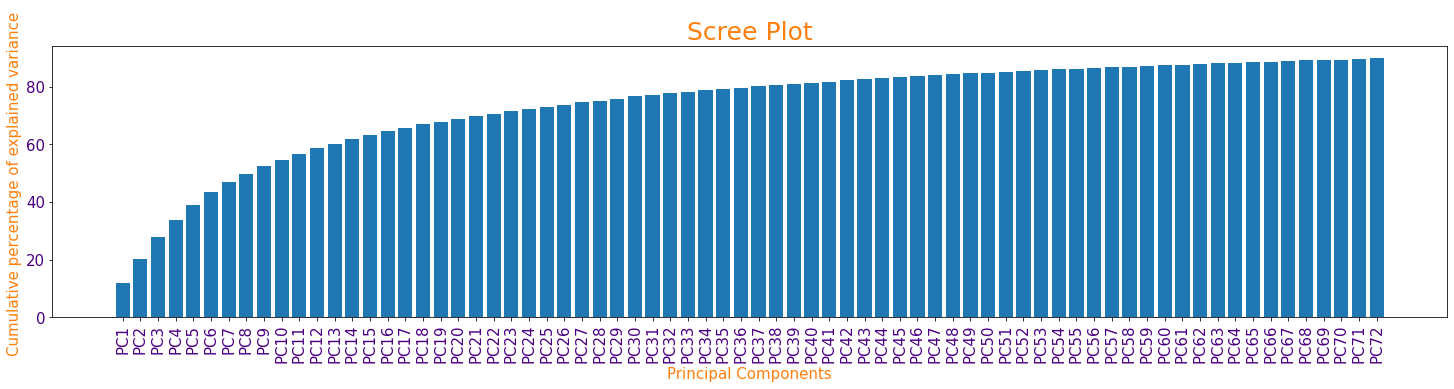

In [70]:
# generate the scree plot
plt.figure(figsize=(25,5))
plt.bar(x=range(1, len(pca_train_X_variation_72)+1), height=pca_train_X_variation_72,tick_label=labels)
plt.xticks(rotation=90, color='indigo', size=15)
plt.yticks(rotation=0, color='indigo', size=15)
plt.title('Scree Plot',color='tab:orange', fontsize=25)
plt.xlabel('Principal Components', {'color': 'tab:orange', 'fontsize':15})
plt.ylabel('Cumulative percentage of explained variance ', {'color': 'tab:orange', 'fontsize':15})

* Above scree plot shows that, considering first 72 principal components should be sufficient to represent the train_X dataset.

* Draw the 2D PCA plot by considering only PC1 and PC2.
    * PCA plot is to visualize how the data is spread across the origin with new coordinates, based on the loading scores and scaling.

In [71]:
# Enter the new coordinates created by pca_fit_transform_train_X_72 into matrix
# Rows are the observations (X) and columns are the Principal components (Y)
pca_fit_transform_train_X_72_df = pd.DataFrame(pca_fit_transform_train_X_72,columns=labels )
# verify the first 2 rows of data with new coordinates
pca_fit_transform_train_X_72_df.head(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72
0,0.853536,-1.231429,2.028732,0.888240,1.620308,-0.067266,0.555436,-1.024861,0.203882,-0.278966,...,0.442997,0.187113,0.060059,-0.285442,-0.213262,1.735745,0.161692,0.162600,0.186648,-0.572077
1,-0.106862,-1.300605,-0.024610,-0.782815,0.269748,0.147612,1.091444,-0.730456,-0.029105,0.586987,...,0.051266,-0.011726,-0.170447,-0.004101,-0.067187,0.210301,0.103604,0.484842,0.285515,0.052700


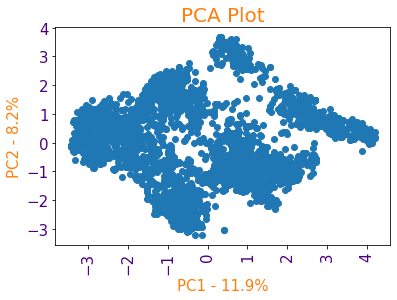

In [72]:
# Draw the 2D PCA plot for PC1 and PC2
## Removing the cumsum() from the earlier expalained ratio calculation
pca_train_X_variation_72_Nocumsum = np.round(pca_fit_train_X_72.explained_variance_ratio_*100,decimals=1)
plt.title('PCA Plot',color='tab:orange', fontsize=20)
plt.scatter(pca_fit_transform_train_X_72_df.PC1, pca_fit_transform_train_X_72_df.PC2)
plt.xticks(rotation=90, color='indigo', size=15)
plt.yticks(rotation=0, color='indigo', size=15)
# The principal components are zero-indexed, So, using PC1=[0], PC2=[1]
plt.xlabel('PC1 - {0}%'.format(pca_train_X_variation_72_Nocumsum[0]), {'color': 'tab:orange', 'fontsize':15});
plt.ylabel('PC2 - {0}%'.format(pca_train_X_variation_72_Nocumsum[1]), {'color': 'tab:orange', 'fontsize':15});

* Above PCA plot shows that how the data is spread along X-axis(PC1) and Y-axis (PC2).
* 11.9% variance of the data is explained by PC1 and 8.2 % of data is explained by PC2.
* Similarly we visulaize how the data is spread among other pricipal components as well.
* The Loading scores explains the proportion of each observation with respect to each principal components, Lets print it.

In [73]:
# Print the loading scores
#Lets check only for the PC1
loading_scores = pd.Series(pca_72.components_[0])
#sort the loading scores based on absolute value
sorted_loading_scores=loading_scores.abs().sort_values(ascending=False)
# display only the top 10 loading scores
sorted_loading_scores[0:10]

169    0.191403
175    0.191403
333    0.186282
170    0.182937
225    0.182545
329    0.179593
230    0.179417
376    0.179417
173    0.177518
161    0.177018
dtype: float64

In [74]:
# Print the minimum and maximum loading scores of PC1
print(sorted_loading_scores.min())
print(sorted_loading_scores.max())

1.9545062087806736e-06
0.19140322159557818


* It can be concluded from the above loading scores that, almost all the observations of the train datasets plays a role in separating the Principal components PC1.
* Example: The 175th observation has a 1 unit long vector consisting of the following:
    * 0.191403 * PC1 +.......+ Xn * PCn 
    * 0.191403 is the proportion of 175th observation for PC1.
    * This unit vector is called singular vector or eigen vector for PC1.
    * similarly the loading scores will be calculated for PC2 as pca_72.components_[1], etc.

In [75]:
# From PCA, the final train and test datasets are as follows

#train data
pca_fit_transform_train_X_72.shape

(4209, 72)

In [76]:
#test data
pca_transform_test_X_72.shape

(4209, 72)

In [77]:
#train label
train_y.shape

(4209,)

In [78]:
# train ID
train_ID.shape

(4209,)

In [79]:
test_ID.shape

(4209,)

## Predict test_data using XGBoost.

Before predicting the test values, lets check the target variable train_y for any outliers. If present, the value will be replaced with median values.

{'whiskers': [<matplotlib.lines.Line2D at 0xced4b68>,
 'caps': [<matplotlib.lines.Line2D at 0xced4790>,
 'boxes': [<matplotlib.lines.Line2D at 0xced43b8>],
 'medians': [<matplotlib.lines.Line2D at 0xc9bd538>],
 'fliers': [<matplotlib.lines.Line2D at 0xc9bdc28>],
 'means': []}

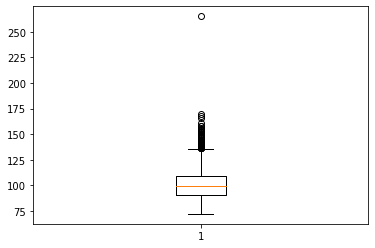

In [80]:
# Using boxplot to identify the outliers
plt.boxplot(train_y)

Outliers are observed in the target variable train_y

In [81]:
# Print the 50th percentile value which is the median
print(train_y.quantile(0.50)) 

99.15


In [82]:
# Print the 95th percentile value 
print(train_y.quantile(0.95)) 

120.80600000000001


In [83]:
# Replace the outlier with median values
train_y = np.where(train_y > 120.80600000000001, 99.15, train_y)

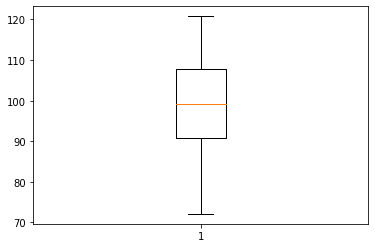

In [84]:
# Verify again with box_plot after replacing the outliers with median values
plt.boxplot(train_y);

In [85]:
# Check the shape again   
train_y.shape

(4209,)

* It is evident from the box plot that outliers are replaced with median values in the target variable train_y.
* Also, there is no change in the shape of the target variable. Hence its good to go with further steps.

In [86]:
# import the required libraries
import xgboost as xgb
from sklearn.model_selection import cross_val_score,cross_val_predict
# Since objective is to predict continuous variable we use XGBregressor
from xgboost import XGBRegressor

__Evaluation metrics for regression__

* We will use R2 in this case.
* R2 is also known as Coefficient of Determination.
* It gives the percentage variation in 'y' (test time) explained by 'X'variables.
* or,it gives the percentage of data points that fall within the regression line.
* R2= (1-SSR/SST) .
* SSR- Sum of square residual; SST- Sum of squares total.
* R2 value should be between 0 to 1.
* -R2 valve indicates the worst model.

In [87]:
# print the XGBoost parameters
print(XGBRegressor())

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)


In [88]:
# Instantiate the Regressor
# specifying random_state ensures same result if we run the model multiple times
# Objective will be automatically set to ''reg:squarederror'
xgb_reg = xgb.XGBRegressor() 

In [89]:
#To find best XGBoost Parameters
params={ 'learning_rate'   : [0.01,0.05,0.1,1] ,
         'max_depth'       : [2,3,5,10],
         'min_child_weight': [ 0, 1, 3],
         'n_estimators'    : [100,150,200,500],
         'gamma'           : [1e-2,1e-3,0,0.1,0.01,0.5,1],
         'colsample_bytree': [0.1,0.5,0.7,1],
         'subsample'       : [0.2,0.3,0.5,1],
         'reg_lambda'      : [0,1,10],
         'reg_alpha'       : [1e-5,1e-3,1e-1,1,1e1] 
        }

__Explainations of the parameters__

* 'max_depth' - Maximum depth of trees (default = 6, range: [0,∞]).
* 'Learning rate'(eta) - scaling the tree by learning rate predicts the output in smaller steps closer to the actual value.
* 'reg_lambda' - L1 regularization parameter on weights to avoid overfit.
*  'reg_alpha' - L1 regularization parameter on weights to avoid overfit.
* 'gamma' - Minimum loss reduction required to make a further partition on a leaf node of the tree (pruning)
* 'min_child_weight' - default =1. If the weights of each leaf is less than the min_child weight, then ramove the leaf.
* So weights of the each leaf is > min_child_weight.
* 'colsample_bytree': It is the subsample ratio of columns when constructing each tree.
* 'Subsample' is the  ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. This will prevent overfitting. 
* Subsampling will occur once in every boosting iteration.
* 'n_estimators' is the number of trees.

In [90]:
# Optimize the Hyperparameter using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [91]:
# Using Random search of parameters with 10 fold cross validation
# Improve the predictions using cross validation to optimize the parameters
Random_Search=RandomizedSearchCV (xgb_reg,params,cv=10, scoring='r2', return_train_score=True, n_jobs=-1,verbose=1) 
# cv=10 - Number of folds in a `(Stratified)KFold`

In [92]:
# Fit the training set to the Randon_Search to obtain the best estimators and parameters.
Random_Search.fit(pca_fit_transform_train_X_72,train_y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100,...
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.1, 0.5, 0.7, 1],
                                        'gamma': [0.01, 0.001, 0, 0.1, 0.01,
    

In [93]:
# Print the best estimator
Random_Search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.01, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=0, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0.1, reg_lambda=0, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [94]:
#Print the best parameters
Random_Search.best_params_

{'subsample': 0.5,
 'reg_lambda': 0,
 'reg_alpha': 0.1,
 'n_estimators': 200,
 'min_child_weight': 0,
 'max_depth': 3,
 'learning_rate': 0.1,
 'gamma': 0.01,
 'colsample_bytree': 0.5}

In [95]:
# Instantiate the XGBoost classifier with the best estimators and parameters
xgb_reg = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.5, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=0, monotone_constraints='()',
             n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=10.0, reg_lambda=10, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [96]:
# Check the r2 score of the model using Number of folds in a `(Stratified)KFold` cv=10
r2_Score = cross_val_score(xgb_reg, pca_fit_transform_train_X_72, train_y, scoring="r2",cv=10)
r2_Score

array([0.65658869, 0.62269409, 0.54269783, 0.65259974, 0.64084153,
       0.57692535, 0.51893168, 0.64919771, 0.64786329, 0.66546407])

In [97]:
# Print the mean r2_score
print('r2_score of the model with cross validation is:',round(r2_Score.mean(),2))

r2_score of the model with cross validation is: 0.62


**Insights**
* Since r2_score with cross validation is: 0.62 or 62 % which is between 50 to 100%. Hence, its good to proceed with the prediction of time the car takes to pass testing using test data.
* This means the model explains 62% variability of the target variable (y) around its mean.

In [98]:
# Fit the training data
xgb_reg.fit(pca_fit_transform_train_X_72,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.5, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=0, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=10.0, reg_lambda=10, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [99]:
# predict the time taken by car to pass testing using test dataset
X_test_pred = xgb_reg.predict(pca_transform_test_X_72)
X_test_pred 

array([ 77.29153 ,  92.26583 ,  77.42101 , ...,  95.991974, 107.90856 ,
        93.93928 ], dtype=float32)

In [100]:
# print the predicted value (time) in the form of table
df_test_pred = pd.DataFrame({'ID': test_ID, 'y': X_test_pred})
# Print the first 10 predicted values
df_test_pred.head(10)

,ID,y
0,1,77.291527
1,2,92.265831
2,3,77.421013
3,4,78.572342
4,5,107.292984
5,8,90.539230
6,10,108.486572
7,11,92.264816
8,12,108.478447
9,14,96.371689


In [101]:
# save the predicted time values 
df_test_pred.to_csv('submission.csv', index=False)

**Conclusion**:
* For a given datasets, XGBoost Regressor algorithm with cross validation results in R2 score of **0.62**.